In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pickle
from shapely.geometry import shape, Point
import rasterio.features
from osgeo import gdal, osr
from shapely.wkt import loads
import json

import warnings
warnings.filterwarnings('ignore')

In [137]:
#load final files
nta_surv_rates = gpd.read_file('../Outputs/nta_racial_ethnic_surveillance.shp')
tracts_surv_rates = gpd.read_file('../Outputs/tract_racial_ethnic_surveillance.shp')

In [138]:
nta_surv_rates.columns

Index(['ntacode', 'ntaname', 'White, not', 'Black or A', 'Asain, not',
       'Hispanic o', 'Other Race', 'boro_code', 'boro_name', 'county_fip',
       'shape_area', 'shape_leng', 'White, n_1', 'White, n_2', 'Black or_1',
       'Black or_2', 'Asain, n_1', 'Asain, n_2', 'Hispanic_1', 'Hispanic_2',
       'Other Ra_1', 'Other Ra_2', 'White, n_3', 'White, n_4', 'Black or_3',
       'Black or_4', 'Asain, n_3', 'Asain, n_4', 'Hispanic_3', 'Hispanic_4',
       'Other Ra_3', 'Other Ra_4', 'Black/Whit', 'Hispanic/W', 'geometry'],
      dtype='object')

In [139]:
tracts_surv_rates.columns

Index(['White, not', 'Black or A', 'Asain, not', 'Hispanic o', 'tract_name',
       'state_id', 'county_id', 'tract_id', 'GEOID', 'Other Race', 'CTLabel',
       'BoroCode', 'BoroName', 'CT2020', 'BoroCT2020', 'CDEligibil', 'NTAName',
       'NTA2020', 'CDTA2020', 'CDTANAME', 'Shape_Leng', 'Shape_Area',
       'White, n_1', 'White, n_2', 'Black or_1', 'Black or_2', 'Asain, n_1',
       'Asain, n_2', 'Hispanic_1', 'Hispanic_2', 'Other Ra_1', 'Other Ra_2',
       'White, n_3', 'White, n_4', 'Black or_3', 'Black or_4', 'Asain, n_3',
       'Asain, n_4', 'Hispanic_3', 'Hispanic_4', 'Other Ra_3', 'Other Ra_4',
       'Black/Whit', 'Hispanic/W', 'geometry'],
      dtype='object')

In [140]:
# Open and read the JSON file
with open('../Outputs/KDE_sampling.json', 'r') as f:
    data = json.load(f)

print(type(data),len(data))

<class 'list'> 3


In [141]:
features = []
for item in data[0]:
    geometry = shape(item['geojson'])
    properties = item['results']
    features.append({"geometry": geometry, "properties": properties})

block_surv = gpd.GeoDataFrame.from_features(features)
block_surv.head()

,geometry,CB2020,BoroCode,BoroName,CT2020,BCTCB2020,GEOID,Shape_Leng,Shape_Area,avg_value,std_dev_value,sample_size,avg_value_scaled,std_dev_scaled,quartile_buckets,quartile_labels
0,"MULTIPOLYGON (((584592.064 4502419.952, 584591...",1,3,Brooklyn,1801,30018010001,360470018010001,1061.915908,14961.031969,1.853225e-10,8.510260e-10,7105,0.009980,0.045831,Q1,Bottom 25%
1,"MULTIPOLYGON (((582738.379 4500475.968, 582748...",1,3,Brooklyn,1803,30018030001,360470018030001,4053.894954,83041.203647,4.333171e-11,2.026676e-10,21120,0.002334,0.010915,Q1,Bottom 25%
2,"MULTIPOLYGON (((582168.929 4499738.822, 582146...",1,3,Brooklyn,1804,30018040001,360470018040001,653.460985,3891.785188,8.548052e-12,3.810951e-11,1680,0.000460,0.002052,Q1,Bottom 25%
3,"POLYGON ((581453.732 4499145.540, 581447.007 4...",1,3,Brooklyn,3400,30034000001,360470034000001,1292.527355,35171.987124,2.219246e-10,4.410400e-10,3654,0.011952,0.023752,Q1,Bottom 25%
4,"MULTIPOLYGON (((583014.760 4503038.093, 583010...",1,3,Brooklyn,5301,30053010001,360470053010001,563.499018,6125.607515,3.002984e-11,1.856010e-10,2905,0.001617,0.009995,Q1,Bottom 25%


In [142]:
features = []
for item in data[1]:
    geometry = shape(item['geojson'])
    properties = item['results']
    features.append({"geometry": geometry, "properties": properties})

tract_surv = gpd.GeoDataFrame.from_features(features)
tract_surv.head()

,geometry,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,...,GEOID,Shape_Leng,Shape_Area,avg_value,std_dev_value,sample_size,avg_value_scaled,std_dev_scaled,quartile_buckets,quartile_labels
0,"POLYGON ((585247.472 4506029.684, 585252.447 4...",1.00,3,Brooklyn,100,3000100,None,Brooklyn Heights,BK0201,BK02,...,36047000100,6611.443960,2.224101e+06,1.711508e-09,2.886487e-09,95937,0.118447,0.199763,Q3,Median to Top 25%
1,"POLYGON ((584007.655 4500982.266, 583958.881 4...",2.00,3,Brooklyn,200,3000200,None,Sunset Park (West),BK0702,BK07,...,36047000200,9075.285121,2.952085e+06,9.131503e-10,1.816372e-09,160820,0.063196,0.125704,Q1,Bottom 25%
2,"POLYGON ((584966.437 4505778.759, 584940.848 4...",3.01,3,Brooklyn,301,3000301,None,Brooklyn Heights,BK0201,BK02,...,36047000301,6525.111338,2.164337e+06,9.005784e-10,1.460793e-09,94458,0.062326,0.101096,Q1,Bottom 25%
3,"POLYGON ((585075.427 4505660.913, 585012.652 4...",5.01,3,Brooklyn,501,3000501,None,Brooklyn Heights,BK0201,BK02,...,36047000501,4828.170276,9.015070e+05,7.750919e-10,2.257502e-09,50568,0.053641,0.156233,Q1,Bottom 25%
4,"POLYGON ((585215.411 4505612.714, 585223.049 4...",5.02,3,Brooklyn,502,3000502,None,Brooklyn Heights,BK0201,BK02,...,36047000502,4902.479685,1.041529e+06,2.378376e-09,5.227909e-09,48573,0.164598,0.361803,Q4,Top 25%


In [143]:
features = []
for item in data[2]:
    geometry = shape(item['geojson'])
    properties = item['results']
    features.append({"geometry": geometry, "properties": properties})

nta_surv = gpd.GeoDataFrame.from_features(features)
nta_surv.head()

,geometry,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,avg_value,std_dev_value,sample_size,avg_value_scaled,std_dev_scaled,quartile_buckets,quartile_labels
0,"POLYGON ((586207.563 4501643.060, 586204.695 4...",3.0,Brooklyn,047,BK40,Windsor Terrace,1.404167e+07,19033.672066,1.448168e-09,4.911048e-09,722880,0.491730,1.730452,Q3,Median to Top 25%
1,"MULTIPOLYGON (((593990.695 4500133.738, 593989...",3.0,Brooklyn,047,BK50,Canarsie,8.208968e+07,43703.609666,1.281708e-09,3.158630e-09,3305123,0.432184,1.103586,Q2,Bottom 25% to Median
2,"POLYGON ((587073.122 4505530.649, 587074.580 4...",3.0,Brooklyn,047,BK68,Fort Greene,1.648282e+07,19825.520859,1.760309e-09,2.488851e-09,574336,0.603387,0.863997,Q3,Median to Top 25%
3,"POLYGON ((592689.215 4503673.539, 592744.085 4...",3.0,Brooklyn,047,BK79,Ocean Hill,2.008991e+07,22494.581245,1.693840e-09,3.410619e-09,1068480,0.579610,1.193727,Q3,Median to Top 25%
4,"POLYGON ((589882.064 4495847.157, 589818.490 4...",3.0,Brooklyn,047,BK44,Madison,2.737916e+07,26237.257649,1.875211e-09,4.399424e-09,1124010,0.644489,1.547437,Q4,Top 25%


In [144]:
nta_surv_rates_csv = pd.read_csv('../Outputs/nta_racial_ethnic_surveillance.csv',index_col = 0)
nta_surv_rates_csv.columns

Index(['ntacode', 'ntaname', 'White, not hispanic',
       'Black or African American, not hispanic', 'Asain, not hispanic',
       'Hispanic or Latino', 'Other Races, not hispanic', 'boro_code',
       'boro_name', 'county_fip', 'shape_area', 'shape_leng', 'geometry',
       'White, not hispanic_avg_surv', 'White, not hispanic_std_surv',
       'Black or African American, not hispanic_avg_surv',
       'Black or African American, not hispanic_std_surv',
       'Asain, not hispanic_avg_surv', 'Asain, not hispanic_std_surv',
       'Hispanic or Latino_avg_surv', 'Hispanic or Latino_std_surv',
       'Other Races, not hispanic_avg_surv',
       'Other Races, not hispanic_std_surv',
       'White, not hispanic_avg_surv_scaled',
       'White, not hispanic_std_surv_scaled',
       'Black or African American, not hispanic_avg_surv_scaled',
       'Black or African American, not hispanic_std_surv_scaled',
       'Asain, not hispanic_avg_surv_scaled',
       'Asain, not hispanic_std_surv_scal

In [145]:
bad_cols = list(nta_surv_rates.columns)
good_cols = list(nta_surv_rates_csv)
print(len(bad_cols),len(good_cols))

35 35


In [146]:
nta_surv_rates = nta_surv_rates.rename(columns = {bad_cols[i]:good_cols[i+1] for i in range(12,34)})
nta_surv_rates.head()

,ntacode,ntaname,"White, not",Black or A,"Asain, not",Hispanic o,Other Race,boro_code,boro_name,county_fip,...,"Black or African American, not hispanic_std_surv_scaled","Asain, not hispanic_avg_surv_scaled","Asain, not hispanic_std_surv_scaled",Hispanic or Latino_avg_surv_scaled,Hispanic or Latino_std_surv_scaled,"Other Races, not hispanic_avg_surv_scaled","Other Races, not hispanic_std_surv_scaled",Black/White_Surv_Rate,Hispanic/White_Surv_Rate,geometry
0,BK40,Windsor Terrace,1752.0,19.0,135.0,363.0,191.0,3.0,Brooklyn,047,...,0.558649,0.637104,1.182960,0.603929,1.395104,0.493640,1.055379,0.363377,1.098873,"POLYGON ((586207.563 4501643.060, 586204.695 4..."
1,BK50,Canarsie,3100.0,58429.0,1865.0,4942.0,2903.0,3.0,Brooklyn,047,...,0.655192,0.396584,0.693170,0.369714,0.647160,0.369733,0.626265,0.908028,0.892246,"MULTIPOLYGON (((593990.695 4500133.738, 593989..."
2,BK68,Fort Greene,2990.0,2591.0,533.0,2115.0,326.0,3.0,Brooklyn,047,...,0.450020,0.440331,0.445319,0.427231,0.430607,0.460033,0.441471,0.943412,0.877694,"POLYGON ((587073.122 4505530.649, 587074.580 4..."
3,BK79,Ocean Hill,10.0,2859.0,32.0,398.0,0.0,3.0,Brooklyn,047,...,0.717992,0.566583,0.703967,0.688248,0.696211,0.000000,0.000000,0.980194,1.050777,"POLYGON ((592689.215 4503673.539, 592744.085 4..."
4,BK44,Madison,4609.0,103.0,507.0,215.0,153.0,3.0,Brooklyn,047,...,0.993644,0.534490,0.910817,0.568330,0.919098,0.619418,0.977765,0.910734,0.920396,"POLYGON ((589882.064 4495847.157, 589818.490 4..."


In [147]:
tracts_surv_rates_csv = pd.read_csv('../Outputs/tract_racial_ethnic_surveillance.csv',index_col = 0)
tracts_surv_rates_csv.columns

Index(['White, not hispanic', 'Black or African American, not hispanic',
       'Asain, not hispanic', 'Hispanic or Latino', 'tract_name', 'state_id',
       'county_id', 'tract_id', 'GEOID', 'Other Races, not hispanic',
       'CTLabel', 'BoroCode', 'BoroName', 'CT2020', 'BoroCT2020', 'CDEligibil',
       'NTAName', 'NTA2020', 'CDTA2020', 'CDTANAME', 'Shape_Leng',
       'Shape_Area', 'geometry', 'White, not hispanic_avg_surv',
       'White, not hispanic_std_surv',
       'Black or African American, not hispanic_avg_surv',
       'Black or African American, not hispanic_std_surv',
       'Asain, not hispanic_avg_surv', 'Asain, not hispanic_std_surv',
       'Hispanic or Latino_avg_surv', 'Hispanic or Latino_std_surv',
       'Other Races, not hispanic_avg_surv',
       'Other Races, not hispanic_std_surv',
       'White, not hispanic_avg_surv_scaled',
       'White, not hispanic_std_surv_scaled',
       'Black or African American, not hispanic_avg_surv_scaled',
       'Black or Afric

In [148]:
csv_cols = list(tracts_surv_rates_csv.columns)[23:]
shp_cols = list(tracts_surv_rates.columns)[22:-1]

tracts_surv_rates = tracts_surv_rates.rename(columns = {shp_cols[i]:csv_cols[i] for i in range(0, len(csv_cols))})

In [149]:
tracts_surv_rates.head()

,"White, not",Black or A,"Asain, not",Hispanic o,tract_name,state_id,county_id,tract_id,GEOID,Other Race,...,"Black or African American, not hispanic_std_surv_scaled","Asain, not hispanic_avg_surv_scaled","Asain, not hispanic_std_surv_scaled",Hispanic or Latino_avg_surv_scaled,Hispanic or Latino_std_surv_scaled,"Other Races, not hispanic_avg_surv_scaled","Other Races, not hispanic_std_surv_scaled",Black/White_Surv_Rate,Hispanic/White_Surv_Rate,geometry
0,3174,677,287,384,Census Tract 1,36,047,000100,36047000100,200,...,0.185140,0.163724,0.173829,0.157764,0.163485,0.172710,0.184056,1.118619,0.981719,"POLYGON ((585247.472 4506029.684, 585252.447 4..."
1,249,23,55,833,Census Tract 2,36,047,000200,36047000200,0,...,0.127816,0.122403,0.116753,0.106487,0.110208,0.000000,0.000000,1.126030,0.929597,"POLYGON ((584007.655 4500982.266, 583958.881 4..."
2,3514,62,63,164,Census Tract 3.01,36,047,000301,36047000301,89,...,0.097140,0.084625,0.090965,0.085501,0.080188,0.085028,0.082626,1.070882,0.984210,"POLYGON ((584966.437 4505778.759, 584940.848 4..."
3,3022,233,593,561,Census Tract 5.01,36,047,000501,36047000501,195,...,0.177542,0.100163,0.167700,0.086625,0.150171,0.103395,0.173588,0.950325,0.876019,"POLYGON ((585075.427 4505660.913, 585012.652 4..."
4,2297,38,339,117,Census Tract 5.02,36,047,000502,36047000502,35,...,0.345125,0.273533,0.344129,0.189839,0.306660,0.199222,0.348876,0.798584,0.769480,"POLYGON ((585215.411 4505612.714, 585223.049 4..."


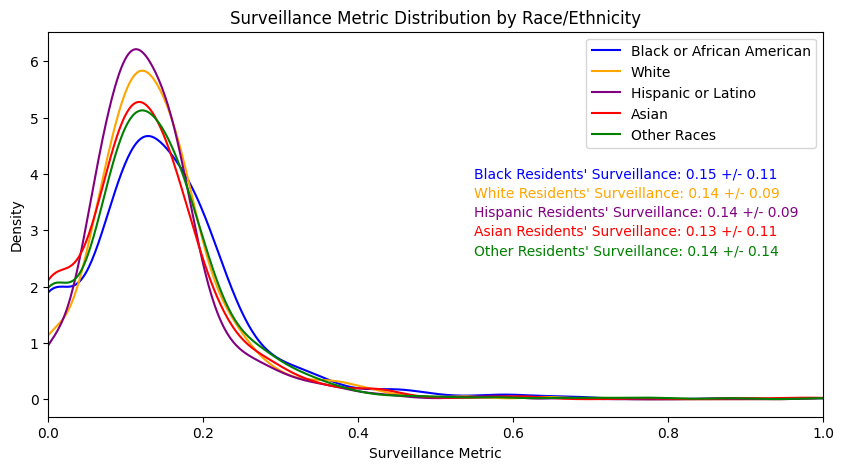

In [174]:
fig, ax = plt.subplots(figsize=(10, 5))
tracts_surv_rates['Black or African American, not hispanic_avg_surv_scaled'].plot(kind='density', color='blue', label='Black or African American', ax=ax)
tracts_surv_rates['White, not hispanic_avg_surv_scaled'].plot(kind='density', color='orange', label='White', ax=ax)
tracts_surv_rates['Hispanic or Latino_avg_surv_scaled'].plot(kind='density', color='purple', label='Hispanic or Latino', ax=ax)
tracts_surv_rates['Asain, not hispanic_avg_surv_scaled'].plot(kind='density', color='red', label='Asian', ax=ax)
tracts_surv_rates['Other Races, not hispanic_avg_surv_scaled'].plot(kind='density', color='green', label='Other Races', ax=ax)

# Calculate mean and standard deviation
black_mean = tracts_surv_rates['Black or African American, not hispanic_avg_surv_scaled'].mean()
black_std = tracts_surv_rates['Black or African American, not hispanic_avg_surv_scaled'].std()
white_mean = tracts_surv_rates['White, not hispanic_avg_surv_scaled'].mean()
white_std = tracts_surv_rates['White, not hispanic_avg_surv_scaled'].std()
hispanic_mean = tracts_surv_rates['Hispanic or Latino_avg_surv_scaled'].mean()
hispanic_std = tracts_surv_rates['Hispanic or Latino_avg_surv_scaled'].std()
asian_mean = tracts_surv_rates['Asain, not hispanic_avg_surv_scaled'].mean()
asian_std = tracts_surv_rates['Asain, not hispanic_avg_surv_scaled'].std()
other_mean = tracts_surv_rates['Other Races, not hispanic_avg_surv_scaled'].mean()
other_std = tracts_surv_rates['Other Races, not hispanic_avg_surv_scaled'].std()

# Add lines of text
ax.text(0.55, 0.65, f"Black Residents' Surveillance: {black_mean:.2f} +/- {black_std:.2f}", transform=ax.transAxes, ha='left', va='top', color='blue')
ax.text(0.55, 0.6, f"White Residents' Surveillance: {white_mean:.2f} +/- {white_std:.2f}", transform=ax.transAxes, ha='left', va='top', color='orange')
ax.text(0.55, 0.55, f"Hispanic Residents' Surveillance: {hispanic_mean:.2f} +/- {hispanic_std:.2f}", transform=ax.transAxes, ha='left', va='top', color='purple')
ax.text(0.55, 0.5, f"Asian Residents' Surveillance: {asian_mean:.2f} +/- {asian_std:.2f}", transform=ax.transAxes, ha='left', va='top', color='red')
ax.text(0.55, 0.45, f"Other Residents' Surveillance: {other_mean:.2f} +/- {other_mean:.2f}", transform=ax.transAxes, ha='left', va='top', color='green')



plt.xlim([0,1])
plt.xlabel('Surveillance Metric')
plt.title('Surveillance Metric Distribution by Race/Ethnicity')
plt.legend()
plt.savefig('../Outputs/race_surv_lineplot.png',bbox_inches = 'tight')
plt.show()


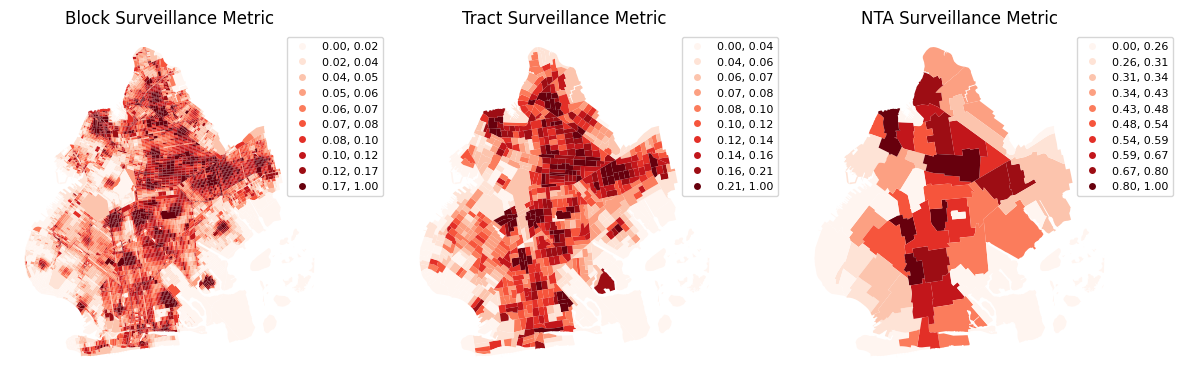

In [151]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 8))

# Plot block_surv
axs[0].set_title('Block Surveillance Metric')
block_surv.plot(column='avg_value_scaled', cmap='Reds',scheme = 'Quantiles',k = 10,legend = True, ax=axs[0],
               legend_kwds = {'bbox_to_anchor':(0.85,1),'loc':'upper left','prop':{'size':8},'markerscale':0.5})
axs[0].axis('off')
axs[1].set_title('Tract Surveillance Metric')
tract_surv.plot(column='avg_value_scaled', cmap='Reds',scheme = 'Quantiles',k = 10,legend = True, ax=axs[1],
               legend_kwds = {'bbox_to_anchor':(0.85,1),'loc':'upper left','prop':{'size':8},'markerscale':0.5})
axs[1].axis('off')
axs[2].set_title('NTA Surveillance Metric')
nta_surv.plot(column='avg_value_scaled', cmap='Reds',scheme = 'Quantiles',k = 10,legend = True, ax=axs[2],
               legend_kwds = {'bbox_to_anchor':(0.85,1),'loc':'upper left','prop':{'size':8},'markerscale':0.5})
axs[2].axis('off')
# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('../Outputs/block_tract_nta_surv_metric.png',bbox_inches = 'tight')
# Show the plot
plt.show()

In [152]:
nta_surv.sort_values(by = 'avg_value_scaled', ascending = False).head(10)

,geometry,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,avg_value,std_dev_value,sample_size,avg_value_scaled,std_dev_scaled,quartile_buckets,quartile_labels
11,"POLYGON ((588934.654 4499171.939, 588852.881 4...",3.0,Brooklyn,047,BK95,Erasmus,1.453119e+07,18757.261640,2.869051e-09,7.048520e-09,527858,1.000000,2.495057,Q4,Top 25%
6,"POLYGON ((587015.491 4500012.023, 587021.874 4...",3.0,Brooklyn,047,BK41,Kensington-Ocean Parkway,1.589333e+07,20800.747260,2.634905e-09,8.390196e-09,780230,0.916242,2.974994,Q4,Top 25%
45,"POLYGON ((586243.958 4506617.028, 586243.698 4...",3.0,Brooklyn,047,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,2.847694e+07,32542.664431,2.509124e-09,3.922484e-09,1083342,0.871249,1.376828,Q4,Top 25%
31,"POLYGON ((587734.598 4496264.748, 587650.699 4...",3.0,Brooklyn,047,BK46,Ocean Parkway South,1.778210e+07,21975.997211,2.400609e-09,5.210564e-09,634810,0.832431,1.837593,Q4,Top 25%
26,"POLYGON ((590489.482 4504167.728, 590503.358 4...",3.0,Brooklyn,047,BK61,Crown Heights North,5.162717e+07,35651.019380,2.386813e-09,4.052189e-09,1848716,0.827496,1.423226,Q4,Top 25%
9,"POLYGON ((592989.384 4503316.851, 593025.482 4...",3.0,Brooklyn,047,BK85,East New York (Pennsylvania Ave),1.939753e+07,24226.851628,2.305099e-09,5.074096e-09,998686,0.798266,1.788777,Q4,Top 25%
7,"POLYGON ((589387.289 4506073.838, 589236.125 4...",3.0,Brooklyn,047,BK75,Bedford,3.262979e+07,29992.924096,2.219826e-09,3.896324e-09,1170813,0.767763,1.367470,Q4,Top 25%
8,"POLYGON ((592894.323 4501831.339, 592929.605 4...",3.0,Brooklyn,047,BK81,Brownsville,3.271793e+07,27297.177171,2.182442e-09,3.653409e-09,1527116,0.754390,1.280576,Q4,Top 25%
30,"POLYGON ((589026.536 4498124.929, 589067.969 4...",3.0,Brooklyn,047,BK43,Midwood,3.579958e+07,27996.590624,2.139446e-09,5.398276e-09,1282446,0.739010,1.904741,Q4,Top 25%
23,"POLYGON ((587986.460 4508686.002, 588022.344 4...",3.0,Brooklyn,047,BK73,North Side-South Side,2.886214e+07,28158.316370,2.101422e-09,3.300677e-09,1054352,0.725408,1.154399,Q4,Top 25%


In [153]:
nta_surv.sort_values(by = 'avg_value_scaled').head(6)

,geometry,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,avg_value,std_dev_value,sample_size,avg_value_scaled,std_dev_scaled,quartile_buckets,quartile_labels
50,"MULTIPOLYGON (((591807.932 4493396.202, 591811...",3.0,Brooklyn,047,BK99,park-cemetery-etc-Brooklyn,2.253712e+08,385416.940246,7.352578e-11,5.647267e-10,58974797,0.000000,0.175710,NaN,NaN
38,"MULTIPOLYGON (((593995.241 4500135.148, 593994...",3.0,Brooklyn,047,BK93,Starrett City,1.159895e+07,17414.782654,3.290822e-10,6.409108e-10,613285,0.091416,0.202962,Q1,Bottom 25%
43,"POLYGON ((585610.141 4501550.036, 585605.162 4...",3.0,Brooklyn,047,BK32,Sunset Park West,4.995560e+07,83039.170584,6.057903e-10,1.729576e-09,3870960,0.190399,0.592393,Q1,Bottom 25%
15,"POLYGON ((586780.311 4492988.405, 586780.318 4...",3.0,Brooklyn,047,BK21,Seagate-Coney Island,3.876253e+07,51826.939331,6.669520e-10,1.255300e-09,1919256,0.212277,0.422738,Q1,Bottom 25%
36,"POLYGON ((591571.351 4498441.321, 591554.709 4...",3.0,Brooklyn,047,BK45,Georgetown-Marine Park-Bergen Beach-Mill Basin,6.945515e+07,90658.987463,7.904601e-10,3.262596e-09,3695552,0.256458,1.140777,Q1,Bottom 25%
29,"POLYGON ((581822.720 4499642.525, 582032.784 4...",3.0,Brooklyn,047,BK31,Bay Ridge,6.722664e+07,44542.276497,7.992323e-10,1.853764e-09,2583044,0.259596,0.636817,Q1,Bottom 25%


In [154]:
#count how many tracts are zero or inf
len(tracts_surv_rates[(tracts_surv_rates['Black/White_Surv_Rate']==0)|(tracts_surv_rates['Black/White_Surv_Rate']==np.inf)])

87

In [155]:
len(tracts_surv_rates[(tracts_surv_rates['Hispanic/White_Surv_Rate']==0)|(tracts_surv_rates['Hispanic/White_Surv_Rate']==np.inf)])

21

In [156]:
len(tracts_surv_rates)

804

In [157]:
87/804

0.10820895522388059

In [158]:
21/804

0.026119402985074626

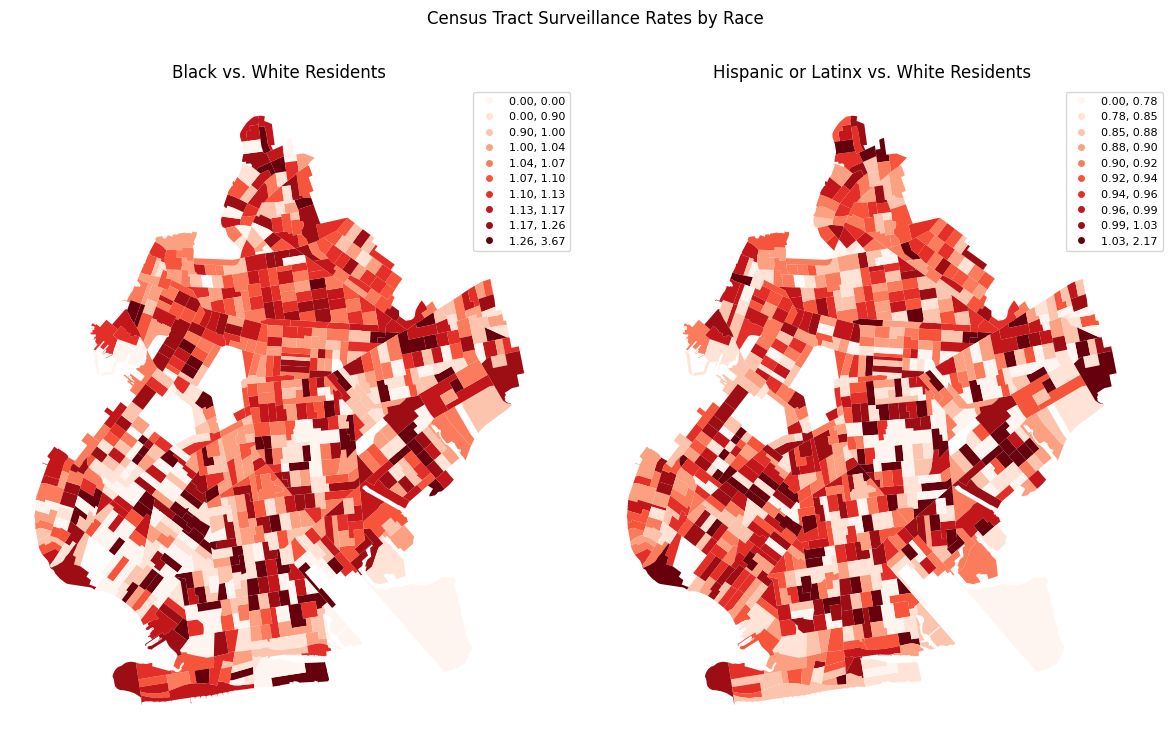

In [131]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
# Replace inf values with 0
tracts_surv_rates['Black/White_Surv_Rate'] = tracts_surv_rates['Black/White_Surv_Rate'].replace(np.inf, 0)
tracts_surv_rates['Hispanic/White_Surv_Rate'] = tracts_surv_rates['Hispanic/White_Surv_Rate'].replace(np.inf, 0)
# Plot block_surv
axs[0].set_title('Black vs. White Residents')
tracts_surv_rates.plot(column='Black/White_Surv_Rate', cmap='Reds',scheme = 'Quantiles',k = 10,legend = True, ax=axs[0],
               legend_kwds = {'bbox_to_anchor':(0.85,1),'loc':'upper left','prop':{'size':8},'markerscale':0.5})
axs[0].axis('off')

axs[1].set_title('Hispanic or Latinx vs. White Residents')
tracts_surv_rates.plot(column='Hispanic/White_Surv_Rate', cmap='Reds',scheme = 'Quantiles',k = 10,legend = True, ax=axs[1],
               legend_kwds = {'bbox_to_anchor':(0.85,1),'loc':'upper left','prop':{'size':8},'markerscale':0.5})
axs[1].axis('off')

plt.suptitle('Census Tract Surveillance Rates by Race')
# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('../Outputs/tract_survrates_race_metric.png',bbox_inches = 'tight')
# Show the plot
plt.show()

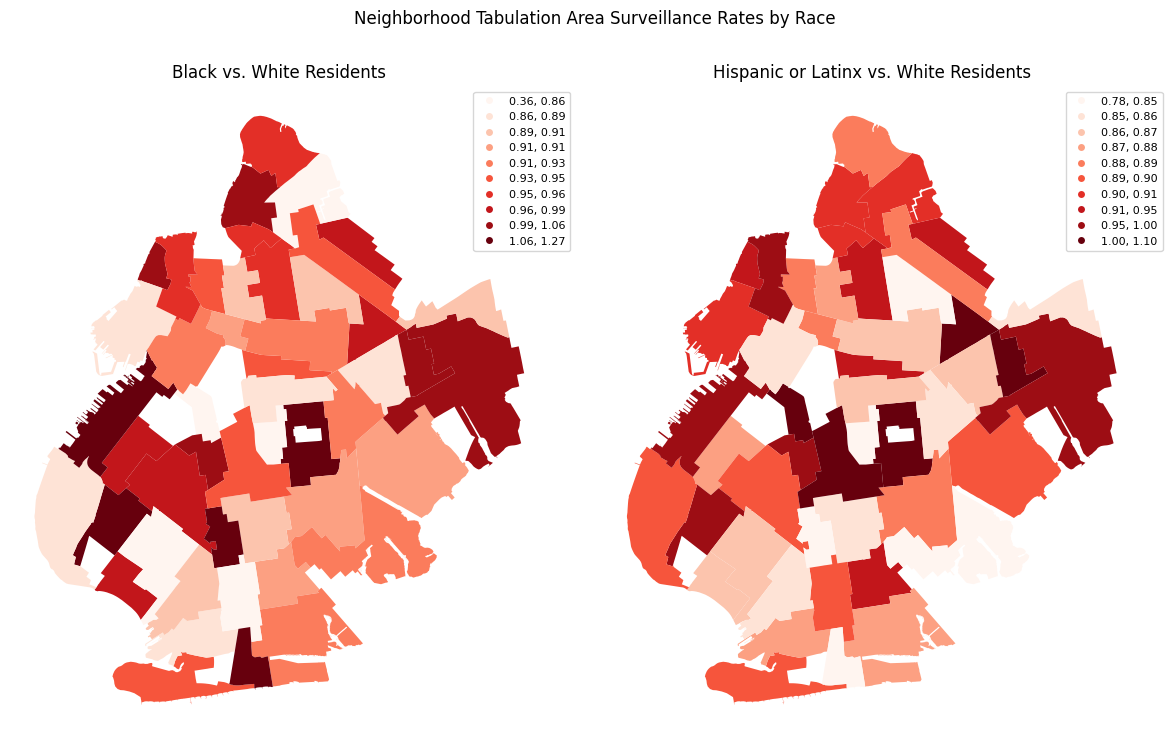

In [168]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
# Replace inf values with 0
nta_surv_rates['Black/White_Surv_Rate'] = nta_surv_rates['Black/White_Surv_Rate'].replace(np.inf, 0)
nta_surv_rates['Hispanic/White_Surv_Rate'] = nta_surv_rates['Hispanic/White_Surv_Rate'].replace(np.inf, 0)

# Plot block_surv
axs[0].set_title('Black vs. White Residents')
nta_surv_rates.plot(column='Black/White_Surv_Rate', cmap='Reds',scheme = 'Quantiles',k = 10,legend = True, ax=axs[0],
               legend_kwds = {'bbox_to_anchor':(0.85,1),'loc':'upper left','prop':{'size':8},'markerscale':0.5})
axs[0].axis('off')

axs[1].set_title('Hispanic or Latinx vs. White Residents')
nta_surv_rates.plot(column='Hispanic/White_Surv_Rate', cmap='Reds',scheme = 'Quantiles',k = 10,legend = True, ax=axs[1],
               legend_kwds = {'bbox_to_anchor':(0.85,1),'loc':'upper left','prop':{'size':8},'markerscale':0.5})
axs[1].axis('off')

plt.suptitle('Neighborhood Tabulation Area Surveillance Rates by Race')
# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('../Outputs/nta_survrates_race_metric.png',bbox_inches = 'tight')
# Show the plot
plt.show()

In [110]:
tracts_surv_rates.sort_values(by = 'Black/White_Surv_Rate').head(20)

,"White, not",Black or A,"Asain, not",Hispanic o,tract_name,state_id,county_id,tract_id,GEOID,Other Race,...,"Black or African American, not hispanic_std_surv_scaled","Asain, not hispanic_avg_surv_scaled","Asain, not hispanic_std_surv_scaled",Hispanic or Latino_avg_surv_scaled,Hispanic or Latino_std_surv_scaled,"Other Races, not hispanic_avg_surv_scaled","Other Races, not hispanic_std_surv_scaled",Black/White_Surv_Rate,Hispanic/White_Surv_Rate,geometry
171,1142,0,1005,289,Census Tract 214,36,047,021400,36047021400,46,...,0.0,0.194575,0.176462,0.181619,0.162178,0.197549,0.185951,0.0,1.001576,"POLYGON ((584606.240 4498311.863, 584557.697 4..."
139,1328,0,1078,832,Census Tract 180,36,047,018000,36047018000,15,...,0.0,0.047267,0.067627,0.047903,0.064365,0.046127,0.068288,0.0,0.947106,"POLYGON ((584306.225 4495938.664, 584239.354 4..."
467,3303,0,695,98,Census Tract 544,36,047,054400,36047054400,44,...,0.0,0.161643,0.223026,0.151661,0.206077,0.155231,0.232986,0.0,0.963612,"POLYGON ((588419.063 4496080.922, 588339.246 4..."
471,2987,0,263,1144,Census Tract 549,36,047,054900,36047054900,183,...,0.0,0.149414,0.131106,0.119834,0.120988,0.145572,0.136354,0.0,0.898295,"POLYGON ((587726.737 4507233.519, 587694.759 4..."
262,1225,0,583,103,Census Tract 308,36,047,030800,36047030800,33,...,0.0,0.067664,0.060005,0.057999,0.053950,0.067323,0.058642,0.0,0.815484,"POLYGON ((586804.909 4493762.204, 586804.281 4..."
70,143,0,1712,605,Census Tract 94.01,36,047,009401,36047009401,0,...,0.0,0.091963,0.142023,0.079268,0.129346,0.000000,0.000000,0.0,0.818717,"POLYGON ((584534.353 4499772.436, 584485.710 4..."
483,1666,0,155,29,Census Tract 562,36,047,056200,36047056200,86,...,0.0,0.094780,0.134666,0.085363,0.120565,0.141313,0.156709,0.0,0.781992,"POLYGON ((589203.350 4495417.224, 589221.067 4..."
487,2761,0,119,418,Census Tract 565,36,047,056500,36047056500,134,...,0.0,0.085751,0.108510,0.092517,0.103574,0.113026,0.117027,0.0,1.063677,"POLYGON ((588359.338 4509180.956, 588279.052 4..."
66,137,0,404,847,Census Tract 90.01,36,047,009001,36047009001,0,...,0.0,0.144801,0.146325,0.151000,0.130192,0.000000,0.000000,0.0,1.132254,"POLYGON ((584881.926 4500205.193, 584864.593 4..."
489,817,0,453,51,Census Tract 568,36,047,056800,36047056800,119,...,0.0,0.381626,0.477226,0.430372,0.526078,0.453758,0.501700,0.0,1.230446,"POLYGON ((590103.129 4495092.266, 590151.282 4..."


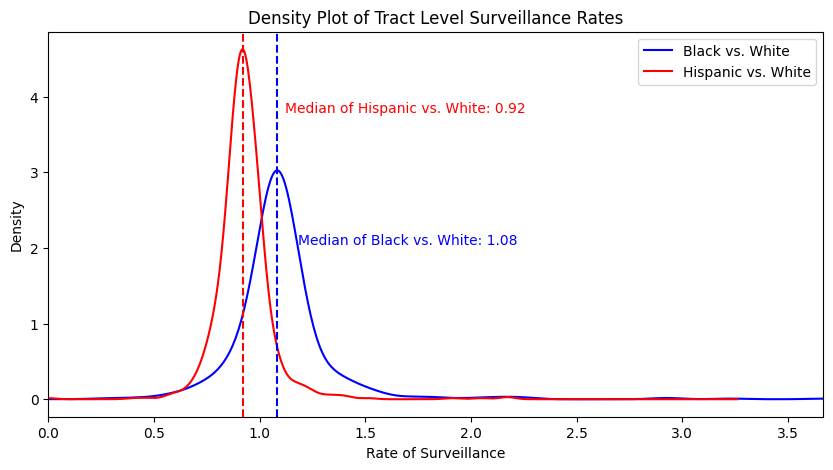

In [135]:
fig, ax = plt.subplots(figsize=(10, 5))

# Replace inf values with 0
black_white_surv_rate = tracts_surv_rates[tracts_surv_rates['Black/White_Surv_Rate']>0]['Black/White_Surv_Rate']
hisp_white_surv_rate = tracts_surv_rates[tracts_surv_rates['Hispanic/White_Surv_Rate']>0]['Hispanic/White_Surv_Rate']
# Drop NaN values
black_white_surv_rate = black_white_surv_rate.dropna()
hisp_white_surv_rate = hisp_white_surv_rate.dropna()

#medians 
black_white_med = black_white_surv_rate.median()
hisp_white_med = hisp_white_surv_rate.median()
#plot densitys
black_white_surv_rate.plot(kind='density', color='blue', label='Black vs. White', ax=ax)
hisp_white_surv_rate.plot(kind='density', color='red', label='Hispanic vs. White', ax=ax)
#plot medians
# Add vertical line for median
ax.axvline(black_white_med, color='blue', linestyle='--')
ax.axvline(hisp_white_med, color='red', linestyle='--')

# Add text for median value
ax.text(black_white_med+.1, 2, f'Median of Black vs. White: {black_white_med:.2f}', color='blue', ha='left', va='bottom')
ax.text(hisp_white_med+.2, 3.75, f'Median of Hispanic vs. White: {hisp_white_med:.2f}', color='red', ha='left', va='bottom')
plt.xlim([0,black_white_surv_rate.max()])
plt.xlabel('Rate of Surveillance')
plt.legend()
plt.title('Density Plot of Tract Level Surveillance Rates')
plt.savefig('../Outputs/density_tract_surv_rates.png',bbox_inches = 'tight')
plt.show()

In [160]:
tracts_surv_rates.columns

Index(['White, not', 'Black or A', 'Asain, not', 'Hispanic o', 'tract_name',
       'state_id', 'county_id', 'tract_id', 'GEOID', 'Other Race', 'CTLabel',
       'BoroCode', 'BoroName', 'CT2020', 'BoroCT2020', 'CDEligibil', 'NTAName',
       'NTA2020', 'CDTA2020', 'CDTANAME', 'Shape_Leng', 'Shape_Area',
       'White, not hispanic_avg_surv', 'White, not hispanic_std_surv',
       'Black or African American, not hispanic_avg_surv',
       'Black or African American, not hispanic_std_surv',
       'Asain, not hispanic_avg_surv', 'Asain, not hispanic_std_surv',
       'Hispanic or Latino_avg_surv', 'Hispanic or Latino_std_surv',
       'Other Races, not hispanic_avg_surv',
       'Other Races, not hispanic_std_surv',
       'White, not hispanic_avg_surv_scaled',
       'White, not hispanic_std_surv_scaled',
       'Black or African American, not hispanic_avg_surv_scaled',
       'Black or African American, not hispanic_std_surv_scaled',
       'Asain, not hispanic_avg_surv_scaled',
      

In [170]:
#lets take the average of the surv rates by ntaname
nta_avgs = tracts_surv_rates[['NTAName','Black/White_Surv_Rate','Hispanic/White_Surv_Rate']].groupby(by = 'NTAName').mean()

In [171]:
nta_avgs.sort_values(by = 'Black/White_Surv_Rate',ascending = False).head(10)

,Black/White_Surv_Rate,Hispanic/White_Surv_Rate
NTAName,,
Holy Cross Cemetery,inf,inf
Park Slope,1.246826,0.896605
Greenpoint,1.180581,0.968945
Ocean Hill,1.179365,0.985978
Fort Hamilton,1.169463,1.334924
East Flatbush-Erasmus,1.142991,0.957103
Coney Island-Sea Gate,1.123177,0.916589
Prospect Heights,1.116301,0.888481
Carroll Gardens-Cobble Hill-Gowanus-Red Hook,1.109951,0.918761


In [172]:
nta_avgs.sort_values(by = 'Black/White_Surv_Rate').head(10)

,Black/White_Surv_Rate,Hispanic/White_Surv_Rate
NTAName,,
Barren Island-Floyd Bennett Field,0.000000,0.000558
Brighton Beach,0.560022,1.080713
Bensonhurst,0.596018,0.927723
Bath Beach,0.713505,0.938067
Dyker Heights,0.726336,0.928898
South Williamsburg,0.733009,0.894593
Sunset Park (Central),0.734052,0.948617
Windsor Terrace-South Slope,0.839957,0.930238
Sheepshead Bay-Manhattan Beach-Gerritsen Beach,0.869994,0.830144
